# Detecting Retina Damage From Optical Coherence Tomography (OCT) Images, using Transfer Learning on VGG16 CNN Model

## Installing and Importing Libraries

In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
from skimage.transform import resize
from skimage.color import gray2rgb
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import SVG
import keract
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications, optimizers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

## Importing Dataset and Data Pre-Processing

In [2]:
data_dir = "../data/OCT2017/"
train_data_dir= '../data/OCT2017/train/'
val_data_dir= '../data/OCT2017/val/'
test_data_dir= '../data/OCT2017/test/'
img_width, img_height = 150, 150 
channels = 3
batch_size = 32

### Keras Data Generators

In [3]:
# instanciation de generateurs de données d'entrainement et de test
test_datagen = ImageDataGenerator(
    rescale= 1./255, 
)
test_generator = test_datagen.flow_from_directory(  
    test_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,        
    class_mode= 'categorical',
    shuffle= False, 
)

Found 968 images belonging to 4 classes.


In [4]:
# encodage des catégories
num_classes = len(test_generator.class_indices)  
test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [5]:
nb_test_samples = len(test_generator.filenames)
print('test set :', nb_test_samples)

test set : 968


## Model

In [6]:
model_name = 'vE10-B64'
model = keras.models.load_model(model_name+"/retinal_oct_model_"+model_name+".h5")
model.evaluate(test_generator)

31/31 [==============================] - 80s 3s/step - loss: 0.3268 - accuracy: 0.8812


[0.32681405544281006, 0.8811983466148376]

31/31 [==============================] - 75s 2s/step


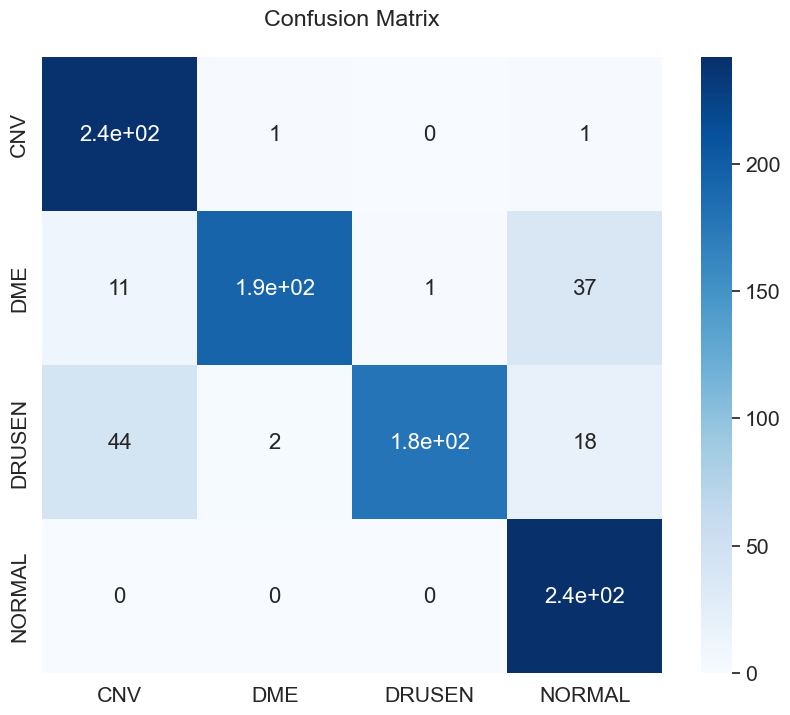

In [8]:
Y_pred = model.predict(test_generator, nb_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\n')
plt.savefig(model_name+'/img/confusion_matrix_'+model_name+'.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()


In [9]:
print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

         CNV       0.81      0.99      0.89       242
         DME       0.98      0.80      0.88       242
      DRUSEN       0.99      0.74      0.85       242
      NORMAL       0.81      1.00      0.90       242

    accuracy                           0.88       968
   macro avg       0.90      0.88      0.88       968
weighted avg       0.90      0.88      0.88       968



In [10]:
model_name2 = 'vE20-B32'
model2 = keras.models.load_model(model_name+"/retinal_oct_model_"+model_name+".h5")
model2.evaluate(test_generator)

31/31 [==============================] - 76s 2s/step - loss: 0.3268 - accuracy: 0.8812


[0.32681405544281006, 0.8811983466148376]

31/31 [==============================] - 83s 3s/step


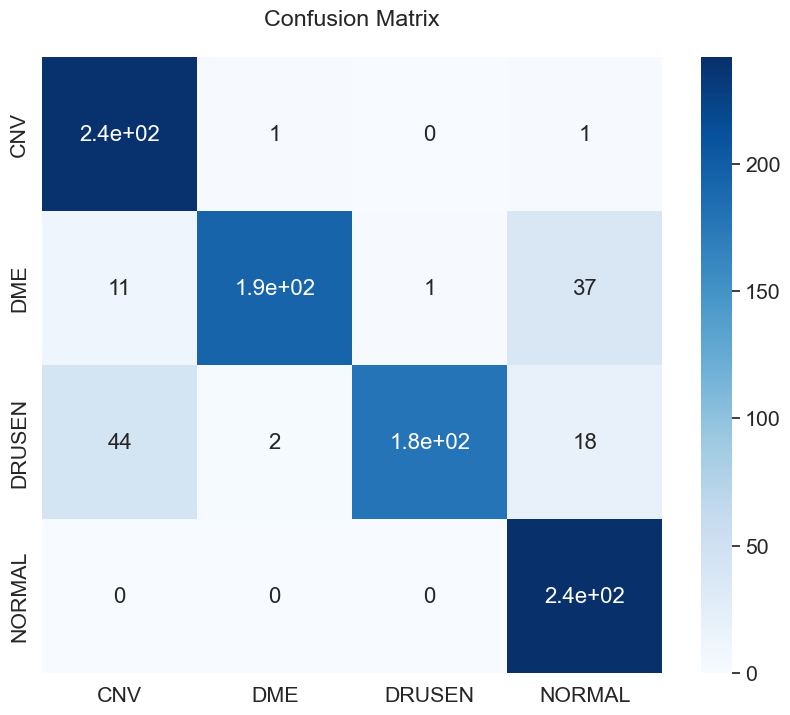

In [12]:
Y_pred2 = model2.predict(test_generator, nb_test_samples // batch_size+1)
y_pred2 = np.argmax(Y_pred2, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred2)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\n')
plt.savefig(model_name+'/img/confusion_matrix_'+model_name+'.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

In [13]:
print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred2, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

         CNV       0.81      0.99      0.89       242
         DME       0.98      0.80      0.88       242
      DRUSEN       0.99      0.74      0.85       242
      NORMAL       0.81      1.00      0.90       242

    accuracy                           0.88       968
   macro avg       0.90      0.88      0.88       968
weighted avg       0.90      0.88      0.88       968

